TensorFlow Version: 2.15.0
NumPy Version: 1.24.3
Pandas Version: 2.0.3
Matplotlib Version: 3.7.2
Seaborn Version: 0.12.2
Classes in the dataset:
1. Karacadag
2. Ipsala
3. Arborio
4. Basmati
5. Jasmine


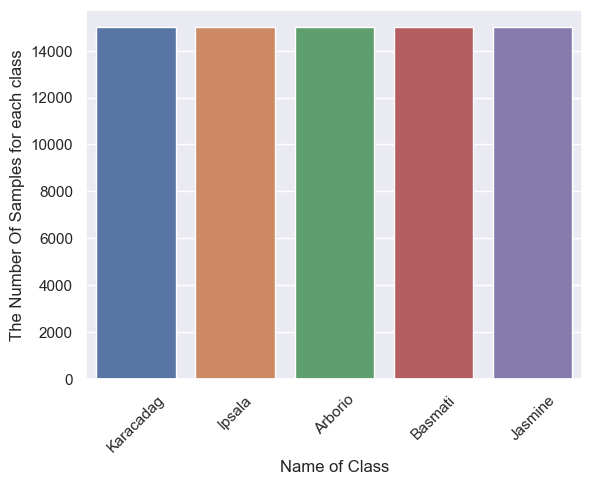

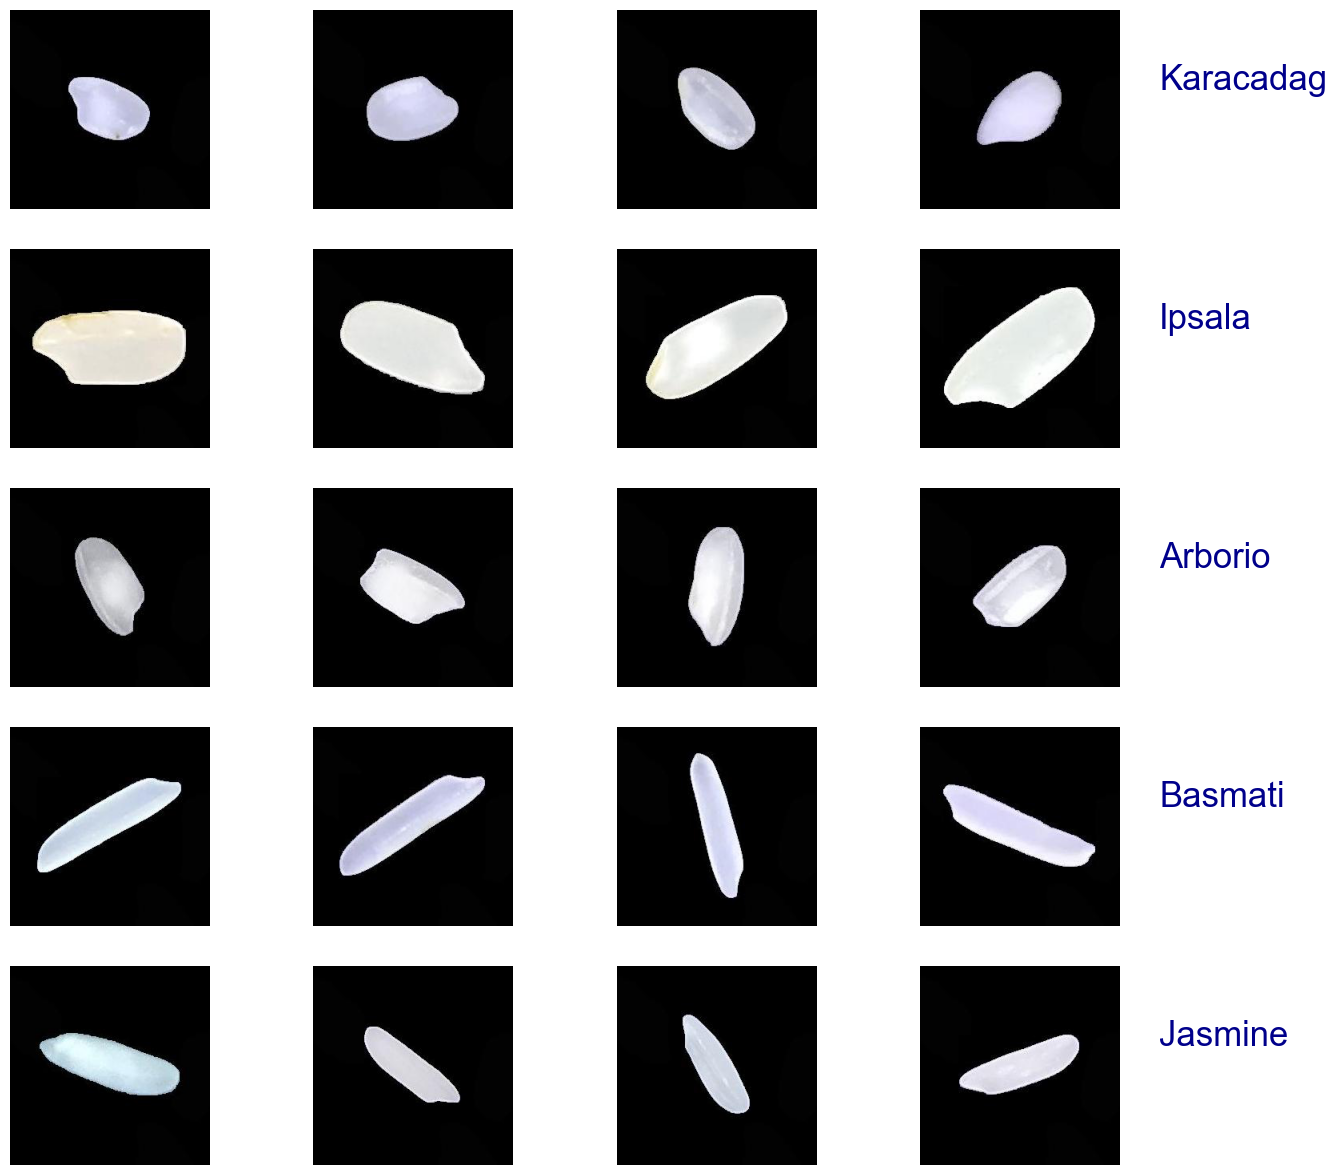

Found 60000 validated image filenames belonging to 5 classes.
Found 15000 validated image filenames belonging to 5 classes.
Found 60000 validated image filenames belonging to 5 classes.
Found 15000 validated image filenames belonging to 5 classes.
Epoch 1/5
1875/1875 [==============================] - 70s 37ms/step - loss: 0.3558 - accuracy: 0.8591 - val_loss: 0.2026 - val_accuracy: 0.9253
Epoch 2/5
1875/1875 [==============================] - 72s 38ms/step - loss: 0.1502 - accuracy: 0.9452 - val_loss: 0.1057 - val_accuracy: 0.9626
Epoch 3/5
1875/1875 [==============================] - 72s 38ms/step - loss: 0.1188 - accuracy: 0.9570 - val_loss: 0.0777 - val_accuracy: 0.9727
Epoch 4/5
1875/1875 [==============================] - 71s 38ms/step - loss: 0.1009 - accuracy: 0.9633 - val_loss: 0.0827 - val_accuracy: 0.9705
Epoch 5/5
469/469 [==============================] - 12s 27ms/step - loss: 0.0779 - accuracy: 0.9711
Accuracy: 0.9710666537284851
Model saved successfully!


In [9]:
# Importing core libraries
import os
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras

# Data visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="darkgrid", color_codes=True)

# Machine learning utilities
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Deep learning modules
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten

# Suppress warnings for clean output
import warnings
warnings.filterwarnings('ignore')

# Display versions of essential libraries for debugging and reproducibility
print("TensorFlow Version:", tf.__version__)
print("NumPy Version:", np.__version__)
print("Pandas Version:", pd.__version__)
print("Matplotlib Version:", plt.matplotlib.__version__)
print("Seaborn Version:", sns.__version__)



# Set the path to the dataset
dataset_path = 'Rice_Image_Dataset'

# Initialize empty lists for storing the images and labels
images = []
labels = []

# Loop over the subfolders in the dataset
for subfolder in os.listdir(dataset_path):
    
    subfolder_path = os.path.join(dataset_path, subfolder)
    if not os.path.isdir(subfolder_path):
        continue
  
  # Loop over the images in the subfolder
    for image_filename in os.listdir(subfolder_path):
       # Load the image and store it in the images list
        image_path = os.path.join(subfolder_path, image_filename)
        images.append(image_path)
    
        # Store the label for the image in the labels list
        labels.append(subfolder)
 
 # Create a pandas DataFrame from the images and labels
df = pd.DataFrame({'image': images, 'label': labels})


import os

# Path to the dataset
dataset_path = 'Rice_Image_Dataset'

# List all subfolder names
classes = [subfolder for subfolder in os.listdir(dataset_path) if os.path.isdir(os.path.join(dataset_path, subfolder))]

# Print the classes
print("Classes in the dataset:")
for i, class_name in enumerate(classes, 1):
    print(f"{i}. {class_name}")


# plot the classes
ax = sns.countplot(x=df.label)

# Set labels and titles
ax.set_xlabel("Name of Class")
ax.set_ylabel("The Number Of Samples for each class")

# Rotate x-axis labels if needed
plt.xticks(rotation=45)

# Display the plot
plt.show()



from matplotlib.gridspec import GridSpec
# Create figure and grid of subplots
fig = plt.figure(figsize=(15, 15))
gs = GridSpec(5, 4, figure=fig)

# Loop through each unique category in the DataFrame
for i, category in enumerate(df['label'].unique()):
    # Get the filepaths for the first four images in the category
    filepaths = df[df['label'] == category]['image'].values[:4]
    
    # Loop through the filepaths and add an image to each subplot
    for j, filepath in enumerate(filepaths):
        ax = fig.add_subplot(gs[i, j])
        ax.imshow(plt.imread(filepath))
        ax.axis('off')
    
    # Add a label to the bottom of the subplot grid
    ax.text(300, 100, category, fontsize=25, color='darkblue')

plt.show()


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df['image'], df['label'], test_size=0.2, random_state=42)

# Create a dataframe for the training data
df_train = pd.DataFrame({'image': X_train, 'label': y_train})

# Create a dataframe for the test data
df_test = pd.DataFrame({'image': X_test, 'label': y_test})

# Encode the labels
encoder = LabelEncoder()
y_train = encoder.fit_transform(y_train)
y_test = encoder.transform(y_test)



from keras.preprocessing.image import ImageDataGenerator
# Set the image size and batch size
image_size = (50, 50)
batch_size = 32

# Create an ImageDataGenerator object with data augmentation options for image preprocessing
datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=45,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)


# Create a generator for the training data
train_generator = datagen.flow_from_dataframe(
    df_train,
    x_col='image',
    y_col='label',
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=True
)

# Create a generator for the test data
test_generator = datagen.flow_from_dataframe(
    df_test,
    x_col='image',
    y_col='label',
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)

from keras.preprocessing.image import ImageDataGenerator
# Set the image size and batch size
image_size = (50, 50)
batch_size = 32

# Create an ImageDataGenerator object with data augmentation options for image preprocessing
datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=45,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)


# Create a generator for the training data
train_generator = datagen.flow_from_dataframe(
    df_train,
    x_col='image',
    y_col='label',
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=True
)

# Create a generator for the test data
test_generator = datagen.flow_from_dataframe(
    df_test,
    x_col='image',
    y_col='label',
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)


from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
# Set the input shape for the model
input_shape = (50, 50, 3)

# Create a Sequential model
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(5, activation='softmax'))


# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model on the training data
history = model.fit_generator(train_generator,epochs=5,validation_data=test_generator)

# Evaluate the model on the test data
metrics = model.evaluate(test_generator)
# Print the accuracy of the model
print('Accuracy:', metrics[1])

# Save the model
model.save('CNN_model.h5')
print ("Model saved successfully!")


In [3]:
from sklearn.preprocessing import LabelEncoder
import numpy as np
from keras.preprocessing import image
from keras.models import load_model

# Load the saved model
model = load_model('CNN_model.h5')
print("Model loaded successfully!")

# Class names (these are the actual class labels from your dataset)
class_names = ['Karacadag', 'Ipsala', 'Arborio', 'Basmati', 'Jasmine']  # Use the actual class names

# Recreate and fit the encoder
encoder = LabelEncoder()
encoder.fit(class_names)

# Preprocess the image
def preprocess_image(img_path, target_size=(50, 50)):
    img = image.load_img(img_path, target_size=target_size)
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = img_array / 255.0  # Rescale the image as you did during training
    return img_array

# Make predictions
def predict_image(img_path):
    img_array = preprocess_image(img_path)
    prediction = model.predict(img_array)
    predicted_class_idx = np.argmax(prediction, axis=1)[0]  # Get the index of the highest probability
    predicted_class = encoder.inverse_transform([predicted_class_idx])[0]  # Decode the index to class label
    return predicted_class, prediction[0][predicted_class_idx]  # Return class name and confidence score

# Test prediction on a new image
img_path = '/Users/shankarvishnu/Desktop/code/Rice Variety/Rice_Image_Dataset/1.jpg'  # Replace with actual image path
predicted_class, confidence = predict_image(img_path)

print(f"Predicted Class: {predicted_class}")
print(f"Confidence: {confidence:.4f}")


Model loaded successfully!
1/1 [==============================] - 0s 25ms/step
Predicted Class: Basmati
Confidence: 0.9999
